In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 50)

import nltk
from nltk import word_tokenize

# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zumiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [145]:
df = pd.read_csv('MachineLearning_reddit.csv')

In [146]:
df.head()

,title,score,id,subreddit,url,num_comments,body,created,timestamp
0,[D] Simple Questions Thread,14,qorekl,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,54,Please post your questions here instead of cre...,1.636301e+09,2021-11-07 17:00:18
1,[P][R] Rocket-recycling with Reinforcement Lea...,607,qt2tws,MachineLearning,https://v.redd.it/enkc1p6oldz71,33,NaN,1.636815e+09,2021-11-13 15:52:07
2,[Project] PyTorch Implementations of 37 GAN pa...,334,qt10az,MachineLearning,https://i.redd.it/fjf94vuj4dz71.png,22,NaN,1.636809e+09,2021-11-13 14:13:18
3,[P] Using Talknet to clone Dreams' voice.,70,qt9yql,MachineLearning,https://v.redd.it/hmw9gpizefz71,19,NaN,1.636837e+09,2021-11-13 21:56:42
4,[R] StyleGAN of All Trades: Image Manipulation...,699,qsw47b,MachineLearning,https://i.redd.it/arv5dyfjfbz71.jpg,12,NaN,1.636789e+09,2021-11-13 08:31:19


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         469 non-null    object 
 1   score         469 non-null    int64  
 2   id            469 non-null    object 
 3   subreddit     469 non-null    object 
 4   url           469 non-null    object 
 5   num_comments  469 non-null    int64  
 6   body          387 non-null    object 
 7   created       469 non-null    float64
 8   timestamp     469 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 33.1+ KB


In [148]:
df.dropna(inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 466
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         387 non-null    object 
 1   score         387 non-null    int64  
 2   id            387 non-null    object 
 3   subreddit     387 non-null    object 
 4   url           387 non-null    object 
 5   num_comments  387 non-null    int64  
 6   body          387 non-null    object 
 7   created       387 non-null    float64
 8   timestamp     387 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 30.2+ KB


In [150]:
df.describe()

,score,num_comments,created
count,387.000000,387.000000,3.870000e+02
mean,33.932817,12.524548,1.635758e+09
std,79.166714,24.979397,6.806483e+05
min,0.000000,0.000000,1.634506e+09
25%,1.000000,1.000000,1.635216e+09
50%,5.000000,4.000000,1.635779e+09
75%,23.000000,10.000000,1.636386e+09
max,662.000000,211.000000,1.636879e+09


In [151]:
df.shape

(387, 9)

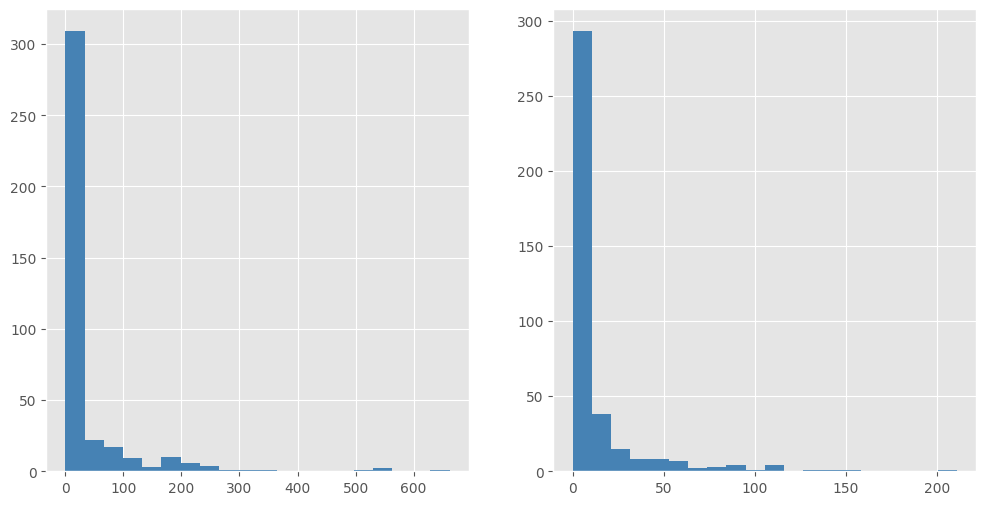

In [152]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)

plt.hist(df['score'], bins = 20, color = 'steelblue')

plt.subplot(1,2,2)

plt.hist(df['num_comments'], bins = 20, color = 'steelblue')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zumiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zumiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zumiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


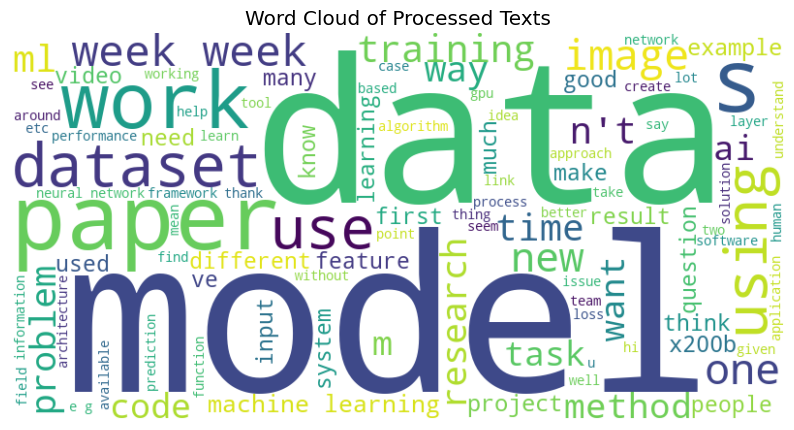

In [153]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Check if the value is a string
    if isinstance(text, str):
        pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        
        # Apply regex to remove links
        text = re.sub(pattern, '', text)
        
        # Tokenization
        tokens = word_tokenize(text.lower())  # Convert to lowercase during tokenization
        
        # Remove punctuation
        tokens = [word for word in tokens if word not in string.punctuation]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back to a single string
        processed_text = ' '.join(tokens)
        
        return processed_text
    else:
        return str(text)  # Convert non-string values to string

processed_texts = df['body'].apply(lambda x: preprocess_text(x))

# Join all processed texts into a single string
all_text = ' '.join(processed_texts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Texts')
plt.show()


### HANDLE Contractions ### !!!!!!


Mean Squared Error: 20.50255306178433


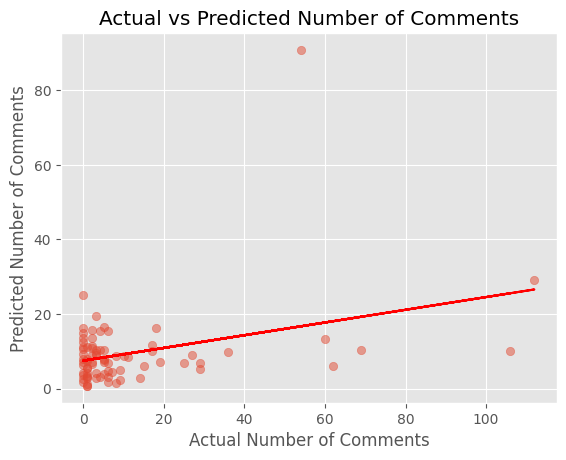

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

# Target variable
y = df['num_comments']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", np.sqrt(mse))

# Create a scatter plot comparing actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Number of Comments')
plt.ylabel('Predicted Number of Comments')
plt.title('Actual vs Predicted Number of Comments')

# Add a trendline (optional)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.show()



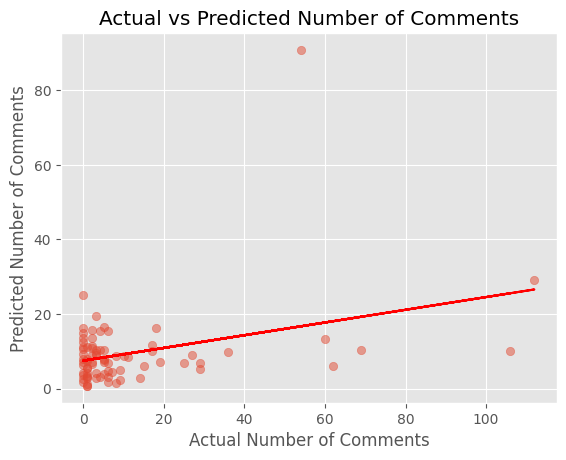

In [155]:
# Create a scatter plot comparing actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Number of Comments')
plt.ylabel('Predicted Number of Comments')
plt.title('Actual vs Predicted Number of Comments')

# Add a trendline (optional)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.show()


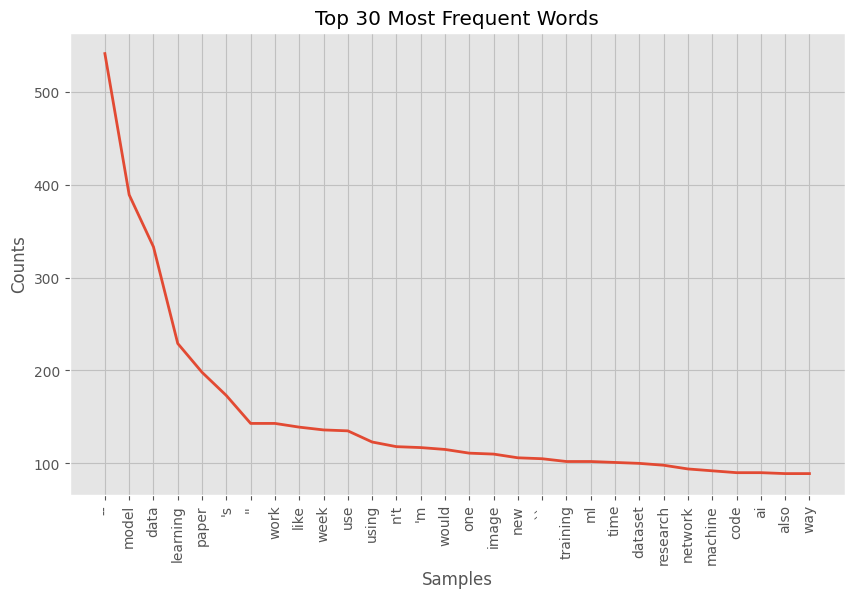

<Axes: title={'center': 'Top 30 Most Frequent Words'}, xlabel='Samples', ylabel='Counts'>

In [156]:
from nltk.probability import FreqDist

# Join all processed texts into a single string
all_text = ' '.join(processed_texts)

# Generate a frequency distribution
tokens = all_text.split()
freq_dist = FreqDist(tokens)

# common_words = freq_dist.most_common(20)
# print(common_words)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.title('Top 30 Most Frequent Words')
freq_dist.plot(30, cumulative=False)

In [157]:


# subreddit Tweets database
# df = pd.read_csv('MachineLearning_reddit.csv')
# len(df)



In [158]:


# inspect the data
df.columns



Index(['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body',
       'created', 'timestamp'],
      dtype='object')

In [159]:


df.head()



,title,score,id,subreddit,url,num_comments,body,created,timestamp
0,[D] Simple Questions Thread,14,qorekl,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,54,Please post your questions here instead of cre...,1.636301e+09,2021-11-07 17:00:18
6,Walk-Forward Target Encoding and Data Leakage [D],3,qtiqlw,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,1,Hi!\n\nI am working on a time series problem w...,1.636867e+09,2021-11-14 06:15:27
7,[N] Introduction to Data Science book updated,0,qtlmql,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,"Hello All,\n\nI have updated my ongoing Data S...",1.636879e+09,2021-11-14 09:39:13
9,[D] Analysis of ICLR 2022 Review Scores,24,qszmuu,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,1,We analysed the relationship between ICLR 2022...,1.636804e+09,2021-11-13 12:45:06
10,[P] Lyric Studio - Artificial Intelligence Son...,1,qtik3a,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,I created this demo in two days (last weekend)...,1.636866e+09,2021-11-14 06:04:08


In [160]:


# compare the subreddits
# df.groupby(['subreddit', 'sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))



In [161]:

df['subreddit'] = df['subreddit']
df['sentiment'] = 'neutral'
# how about the tweets?
df = df[['sentiment', 'subreddit','body' ]]
df.head()



,sentiment,subreddit,body
0,neutral,MachineLearning,Please post your questions here instead of cre...
6,neutral,MachineLearning,Hi!\n\nI am working on a time series problem w...
7,neutral,MachineLearning,"Hello All,\n\nI have updated my ongoing Data S..."
9,neutral,MachineLearning,We analysed the relationship between ICLR 2022...
10,neutral,MachineLearning,I created this demo in two days (last weekend)...


In [162]:


#filtering dataset for United
df = df[df['subreddit']=='MachineLearning'] 
print(len(df))
df = df.reset_index(drop = True)
df.head(10)



387


,sentiment,subreddit,body
0,neutral,MachineLearning,Please post your questions here instead of cre...
1,neutral,MachineLearning,Hi!\n\nI am working on a time series problem w...
2,neutral,MachineLearning,"Hello All,\n\nI have updated my ongoing Data S..."
3,neutral,MachineLearning,We analysed the relationship between ICLR 2022...
4,neutral,MachineLearning,I created this demo in two days (last weekend)...
5,neutral,MachineLearning,I will soon be building a deep learning machin...
6,neutral,MachineLearning,**Video**\n\n[https://youtu.be/LKixq2S2Pz8](h...
7,neutral,MachineLearning,Generally any application software co-exists w...
8,neutral,MachineLearning,A recent paper [On Buggy Resizing Libraries an...
9,neutral,MachineLearning,Are you looking for a time series feature extr...


<Axes: xlabel='sentiment'>

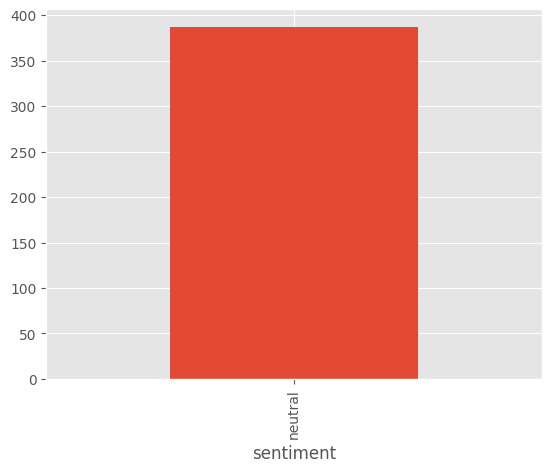

In [163]:


df.groupby('sentiment').size().plot(kind='bar')



In [164]:


# move to sentiment analysis
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #call the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))



In [165]:


# compound value scale = -1 to 1 (-ve to +ve)
print_sentiment_scores("United flight was a bad experience")



United flight was a bad experience------ {'neg': 0.376, 'neu': 0.323, 'pos': 0.301, 'compound': -0.1779}


In [166]:


get_ipython().run_line_magic('time', '# to calulate the time it takes the algorithm to compute a VADER score')
i=0 # counter

compval1 = [ ] # empty list to hold our computed 'compound' VADER scores

while (i<len(df)):

    k = analyser.polarity_scores(str(df.iloc[i]['body']))
    compval1.append(k['compound'])
    
    i = i+1
    
# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)



CPU times: total: 0 ns
Wall time: 0 ns


387

In [167]:


df['VADER score'] = compval1



In [168]:


get_ipython().run_line_magic('time', '')

# assign score categories and logic
i = 0

predicted_value = [ ] # empty series to hold our predicted values

while(i<len(df)):
    if ((df.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((df.iloc[i]['VADER score'] > 0) & (df.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((df.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1



CPU times: total: 0 ns
Wall time: 0 ns


In [169]:


df['predicted sentiment'] = predicted_value



In [170]:


# which classifications were correct?
madeit = df



In [171]:


len(madeit)/len(df)



1.0

<Axes: xlabel='predicted sentiment'>

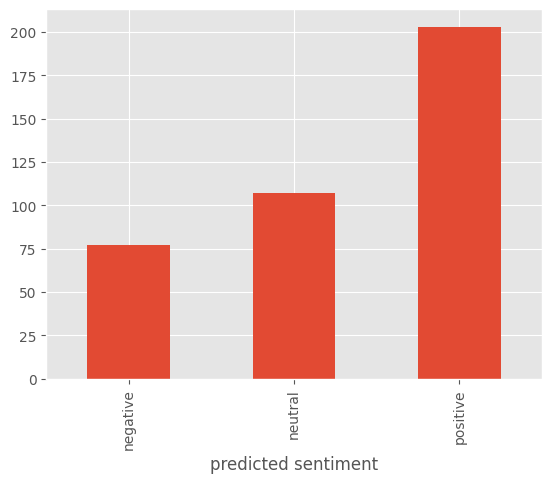

In [172]:


df.groupby('predicted sentiment').size().plot(kind='bar')



In [173]:

# some basic visualization
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

# df = madeit[madeit['predicted sentiment']=='negative']

words = ' '.join(df['body'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
# stopwords.add("amp")
# stopwords.add("flight")
# stopwords.add("united")
# stopwords.add("plane")
# stopwords.add("now")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)



In [179]:


df = madeit[madeit['predicted sentiment']=='negative']

words = ' '.join(df['body'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("model")
stopwords.add("learning")
stopwords.add("training")
stopwords.add("data")
stopwords.add("paper")
stopwords.add("image")
stopwords.add("problem")
stopwords.add("machine")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)



In [175]:
type(cleaned_word)


str

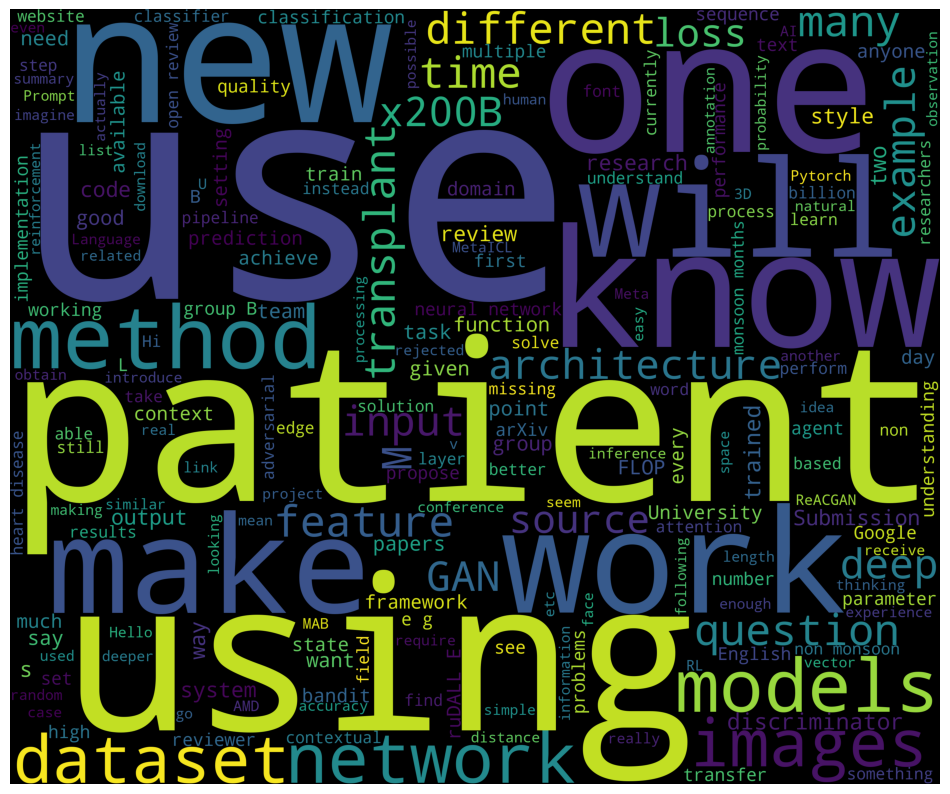

In [180]:


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
